In [12]:
#Start with loading the lib
import FPCAnalysis
import numpy as np

In [13]:
#The FPCAnalysis lib has many submodules that contain many functions of the form FPCAnalysis.*submodule*.*function*(*parameters*)
# Submodules contain groups of functions that are of a similar type or perform similar functions.
# for example, the input load function for dHybridR is  FPCAnalysis.ddhr.read_input(path=path)
# where ddhr is short for 'dHybridR'

import inspect
all_members = dir(FPCAnalysis)
for member in all_members:
    attr = getattr(FPCAnalysis, member)
    if(member[0] != '_' and len(member) < 5):
        if inspect.ismodule(attr):
            print(f"{member} is a submodule")
        elif inspect.isclass(attr):
            print(f"{member} is a class")
        elif inspect.isfunction(attr):
            print(f"{member} is a function")
        else:
            print(f"{member} is of type {type(attr)}")

anl is a submodule
ao is a submodule
ddhr is a submodule
dg is a submodule
dnc is a submodule
dtr is a submodule
fpc is a submodule
ft is a submodule
md is a submodule
pl is a submodule
plot is a submodule
ppl is a submodule
prm is a submodule
ptb is a submodule
sp is a submodule
supp is a submodule
wv is a submodule


In [14]:
# please see __init__.py for aliases of all the submodules
# we print it below

import os
init_file_path = os.path.join(os.path.dirname(FPCAnalysis.__file__), '__init__.py')

with open(init_file_path, 'r') as file:
    init_contents = file.read()
    print(init_contents)

from . import array_ops as ao
from . import analysis as anl
from . import data_gkeyll as dg
from . import data_dhybridr as ddhr
from . import data_netcdf4 as dnc
from . import data_tristan as dtr
from . import fpc as fpc
from . import frametransform as ft
from . import metadata as md
from . import plume as pl
from . import supp as sp
from . import wavemode as wv

from .plot import debug as pltdebug
from .plot import fourier as pltfr
from .plot import plotplume as ppl
from .plot import table as ptb
from .plot import resultsmanager as prm
from .plot import velspace as pltvv
from .plot import twod as plt2d
from .plot import oned as plt1d

def version():
	"""Return the version of the package."""
	import pkg_resources
	try:
		import pkg_resources
		__version__ = pkg_resources.get_distribution(__name__).version
	except:
		print("Error, could not find version (likely because we are using a development version (created by pip install -e .)! Returning hard coded value of version...")
		__versio

In [15]:
#Note that if any changes are made to the library, you will need to reload the specific file for it to take effect!

import importlib
importlib.reload(FPCAnalysis.dtr) #this reloads the data_tristan.py file! (see __init__.py for the aliases)inputs = FPCAnalysis.ddhr.read_input(path=path)

print("*****");print("");print("");print("");print("")
print('One must call importlib.reload(FPCAnalysis.*submodule*) to implement any changes that are made to the submodule \nwhile the notebook is running (one could also just restart the whole notebook)')
print("");print("");print("");print("");print("*****")

*****




One must call importlib.reload(FPCAnalysis.*submodule*) to implement any changes that are made to the submodule 
while the notebook is running (one could also just restart the whole notebook)




*****


In [18]:
#load the input parameters
path = '/home/crbrown/htg_perp_bigrun/'
num = '700'

#Read the inputs
inputpath = path+'/input'
path = path+'/output/'
inputs = FPCAnalysis.dtr.load_input(inputpath)

inputs.keys()

dict_keys(['sizey', 'last', 'c', 'timespan', 'mx0', 'my0', 'mz0', 'conserv', 'highorder', 'Corr', 'ntimes', 'cleanfld', 'cleanint', 'cooling', 'acool', 'splitparts', 'irestart', 'intrestart', 'laprestart', 'namedrestartint', 'interval', 'torqint', 'pltstart', 'istep', 'istep1', 'stride', 'writetestpart', 'selectprt', 'semaphoreN', 'savetmp', 'periodicx', 'periodicy', 'periodicz', 'enlarge', 'movwin', 'shiftinterval', 'shiftstart', 'movwingam', 'btheta', 'bphi', 'usefilter2', 'sigma', 'maxptl0', 'ppc0', 'delgam', 'me', 'mi', 'gamma0', 'c_omp', 'caseinit', '#density_profile', 'temperature_ratio', 'external_fields', 'sigma_ext', 'user_part_bcs', 'wall', 'wallgam', 'rightclean', 'u_sh', 'slowinj', 'injfrac', 'rstart_jump', 'rstep_first', 'rstep_jump'])

In [19]:
#read the parameters of the simulation
params = FPCAnalysis.dtr.load_params(path,num)

params.keys()

dict_keys(['comp', 'c', 'sigma', 'istep', 'massratio', 'mi', 'me', 'ppc', 'sizex', 'delgam'])

In [21]:
#load the fields data
dfields = FPCAnalysis.dtr.load_fields(path,num,normalizeFields=True)
dfields.keys()

dict_keys(['Vframe_relative_to_sim_out', 'ex', 'ey', 'ez', 'bx', 'by', 'bz', 'dens', 'ex_xx', 'ex_yy', 'ex_zz', 'ey_xx', 'ey_yy', 'ey_zz', 'ez_xx', 'ez_yy', 'ez_zz', 'bx_xx', 'bx_yy', 'bx_zz', 'by_xx', 'by_yy', 'by_zz', 'bz_xx', 'bz_yy', 'bz_zz', 'dens_xx', 'dens_yy', 'dens_zz', 'Vframe_relative_to_sim'])

In [37]:
lowerresolution = True #lower field resolution for speed!
if(lowerresolution):
    print('dfields["ex"].shape before:',dfields['ex'].shape)
    dfields = FPCAnalysis.ao.avg_dict(dfields,binidxsz=[1,8,8]) #note, each element in binidxsz must be an integer divisor of the shape of its respective axis
    print('dfields["ex"].shape after:',dfields['ex'].shape)

dfields["ex"].shape before: (2, 2400, 10600)


NameError: name 'dfluc' is not defined

In [38]:
#Note, the simulation is 2D, but we spoof the data into a 3D data object so the FPC functions work
#   This is done by making a copy of the xy plane and stacking it along the z direction

#Note, the fields data in tristan simulations can be quite large!

In [39]:
#_xx, _yy, _zz refers to the grid location in the sim
#bx,by,...,ez are 3D arrays, indexed in the order z,y,x

idxx = 50
idxy = 5
idxz = 0

print("The value of by at z=", dfields['bx_zz'][idxz] , "y= ", dfields['bx_yy'][idxy], "x= ", dfields['bx_xx'][idxx], " is ", dfields['by'][idxz,idxy,idxx])

The value of by at z= 0.0 y=  0.0870362651104627 x=  0.8070761392584207  is  1.1757361791197465


In [40]:
#load particles, with velocities normalzied to upstream thermal species velocity
dpar_elec, dpar_ion = FPCAnalysis.dtr.load_particles(path,num,normalizeVelocity=True)

#ue, ve, we, correspond to the velocity and xe, ye, ze corresond to the position.
#q is the charge
#*Together*, proce and inde give each particle a unique id that can be tracked in time
#    proce is the number of the processor that the particle was generated on. Inde is the index on said processor

dpar_elec.keys()

dict_keys(['ue', 've', 'we', 'xe', 'ye', 'ze', 'gammae', 'inde', 'proce', 'Vframe_relative_to_sim', 'q'])

In [41]:
#dpar_ion is similar
dpar_ion.keys()

dict_keys(['ui', 'vi', 'wi', 'xi', 'yi', 'zi', 'gammai', 'indi', 'proci', 'Vframe_relative_to_sim', 'q'])

In [42]:
#The arrays in the particle dict are parallel
idxpar1 = 1234
print("This position of the ", idxpar1,"th electron is",
      (dpar_elec['xe'][idxpar1],dpar_elec['ye'][idxpar1],dpar_elec['ze'][idxpar1]),
     '. It has momentum vector',
     dpar_elec['ue'][idxpar1],dpar_elec['ve'][idxpar1],dpar_elec['we'][idxpar1])

This position of the  1234 th electron is (1.8228164, 0.0073883804, 0.006511312) . It has momentum vector 1.1578016 1.690741 -1.5047501


In [43]:
print("*****");print("");print("");print("");print("")
print("Now let's plot things. Please ensure that the style libraries for matplotlib cb.mplstyle and postgkyl.mplstyle are in the same directory as this notebook.")
print("");print("");print("");print("");print("*****")

*****




Now let's plot things. Please ensure that the style libraries for matplotlib cb.mplstyle and postgkyl.mplstyle are in the same directory as this notebook.




*****


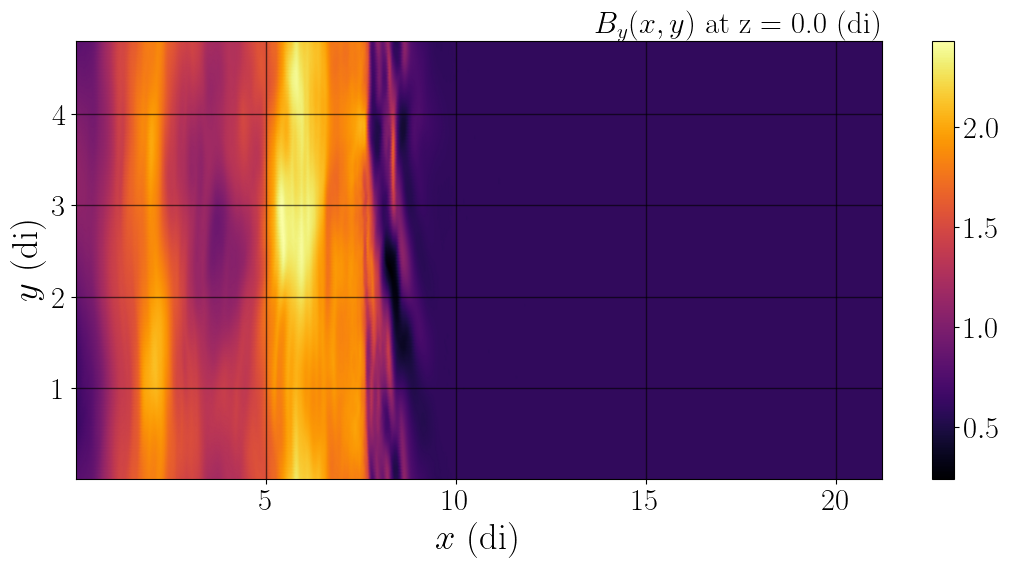

<module 'FPCAnalysis.plot.twod' from '/home/crbrown/FPCAnalysis/FPCAnalysis/plot/twod.py'>

In [44]:
#With these data structures, we can plot them manually or use one of the pre made plot functions!
#Please feel free to modify the plot functions as you see fit!!!
fieldkey = 'by'
planename = 'xy'
FPCAnalysis.plt2d.make_field_pmesh(dfields,fieldkey,planename, zzindex=0, colormap='inferno')
importlib.reload(FPCAnalysis.plt2d) #be sure to reload the module if you make any changes!!

In [69]:
#select the x range of particles to bin for a histogram
x1 = 8
x2 = 8.5
gptsparticle = (x1 <= dpar_ion['xi']) & (dpar_ion['xi'] <= x2)

In [70]:
#create distribution function and plot
#note that this uses all particles loaded into dparticles!!!

vmax = 40
dv = 2

vxbins = np.arange(-vmax, vmax+dv, dv)
vx = (vxbins[1:] + vxbins[:-1])/2.
vybins = np.arange(-vmax, vmax+dv, dv)
vy = (vybins[1:] + vybins[:-1])/2.
vzbins = np.arange(-vmax, vmax+dv, dv)
vz = (vzbins[1:] + vzbins[:-1])/2.
hist,_ = np.histogramdd((dpar_ion['ui'][gptsparticle], dpar_ion['wi'][gptsparticle], dpar_ion['vi'][gptsparticle]), bins=[vzbins, vybins, vxbins])


# make the bins 3d arrays
_vx = np.zeros((len(vz), len(vy), len(vx)))
_vy = np.zeros((len(vz), len(vy), len(vx)))
_vz = np.zeros((len(vz), len(vy), len(vx)))
for i in range(0, len(vx)):
    for j in range(0, len(vy)):
        for k in range(0, len(vz)):
            _vx[k][j][i] = vx[i]

for i in range(0, len(vx)):
    for j in range(0, len(vy)):
        for k in range(0, len(vz)):
            _vy[k][j][i] = vy[j]

for i in range(0, len(vx)):
    for j in range(0, len(vy)):
        for k in range(0, len(vz)):
            _vz[k][j][i] = vz[k]

vx = _vx
vy = _vy
vz = _vz

H_in = hist
hist.shape #indexed like vz,vy,vx so f(vx[i],vy[j],vz[k]) = hist[k,j,i]

(40, 40, 40)

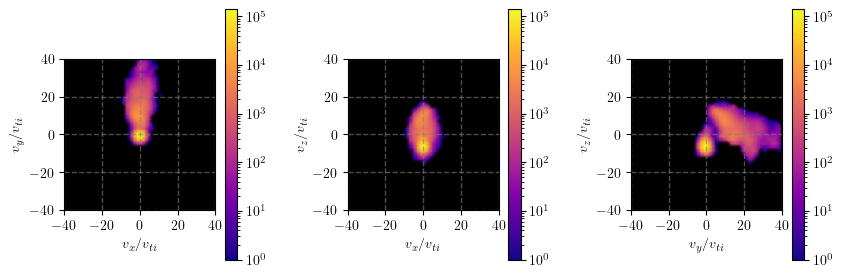

(array([<Axes: xlabel='$v_x/v_{ti}$', ylabel='$v_y/v_{ti}$'>,
        <Axes: xlabel='$v_x/v_{ti}$', ylabel='$v_z/v_{ti}$'>,
        <Axes: xlabel='$v_y/v_{ti}$', ylabel='$v_z/v_{ti}$'>], dtype=object),
 <Figure size 975x325 with 6 Axes>)

In [71]:
flnm = '' #if filename is '' then we don't save. Otherwise, a copy is saved as *filename*.png
FPCAnalysis.pltvv.dist_log_plot_3dir(vx, vy, vz, vmax, H_in, flnm = flnm,ttl='',xlbl=r"$v_x/v_{ti}$",ylbl=r"$v_y/v_{ti}$",zlbl=r"$v_z/v_{ti}$",plotSymLog=False)

In [72]:

import importlib
importlib.reload(FPCAnalysis.pltvv) #this reloads the data_tristan.py file! (see __init__.py for the aliases)inputs = FPCAnalysis.ddhr.read_input(path=path)


<module 'FPCAnalysis.plot.velspace' from '/home/crbrown/FPCAnalysis/FPCAnalysis/plot/velspace.py'>

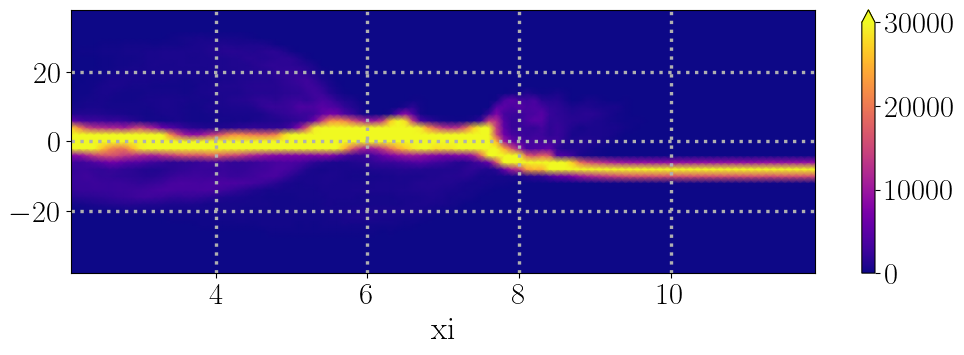

In [78]:

#make phase space plot (similar to Figure 3 of Brown et al 2023- except the cbar scale is different (and if load_all_particles is false, not all particles are loaded to save memory!))
poskey = 'xi'
velkey = 'ui'
xmin = 2
xmax = 12
dx = .1
cbarmax=30000 #colorbar maximum value
FPCAnalysis.pltvv.plot_phaseposvsvx(dpar_ion,poskey,velkey,xmin,xmax,dx,vmax,dv,cbarmax=cbarmax,flnm='')